# MODEL IMPLEMENTATION ON  ENERGY DATASET

# ARIMA

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [88]:
import pandas as pd
df = pd.read_csv("hourly.csv")
print(df.head(5))

              Datetime  PJME_MW
0  2002-12-31 01:00:00  26498.0
1  2002-12-31 02:00:00  25147.0
2  2002-12-31 03:00:00  24574.0
3  2002-12-31 04:00:00  24393.0
4  2002-12-31 05:00:00  24860.0


In [89]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB
None


In [90]:
# Calculate the total number of chunks
total_chunks = len(df) // 5000 + 1

# Split the DataFrame into chunks of 1000 values each
data_chunks = [df.iloc[i*5000:(i+1)*5000] for i in range(total_chunks)]

# Print the size of each chunk
for i, chunk in enumerate(data_chunks):
    print(f"Chunk {i+1}: {chunk.shape}")

Chunk 1: (5000, 2)
Chunk 2: (5000, 2)
Chunk 3: (5000, 2)
Chunk 4: (5000, 2)
Chunk 5: (5000, 2)
Chunk 6: (5000, 2)
Chunk 7: (5000, 2)
Chunk 8: (5000, 2)
Chunk 9: (5000, 2)
Chunk 10: (5000, 2)
Chunk 11: (5000, 2)
Chunk 12: (5000, 2)
Chunk 13: (5000, 2)
Chunk 14: (5000, 2)
Chunk 15: (5000, 2)
Chunk 16: (5000, 2)
Chunk 17: (5000, 2)
Chunk 18: (5000, 2)
Chunk 19: (5000, 2)
Chunk 20: (5000, 2)
Chunk 21: (5000, 2)
Chunk 22: (5000, 2)
Chunk 23: (5000, 2)
Chunk 24: (5000, 2)
Chunk 25: (5000, 2)
Chunk 26: (5000, 2)
Chunk 27: (5000, 2)
Chunk 28: (5000, 2)
Chunk 29: (5000, 2)
Chunk 30: (366, 2)


In [91]:
# Access a specific chunk, for example, the first chunk
data = data_chunks[0]
print("\nFirst Chunk:")
print(data)


First Chunk:
                 Datetime  PJME_MW
0     2002-12-31 01:00:00  26498.0
1     2002-12-31 02:00:00  25147.0
2     2002-12-31 03:00:00  24574.0
3     2002-12-31 04:00:00  24393.0
4     2002-12-31 05:00:00  24860.0
...                   ...      ...
4995  2002-06-06 05:00:00  27381.0
4996  2002-06-06 06:00:00  28722.0
4997  2002-06-06 07:00:00  31728.0
4998  2002-06-06 08:00:00  35269.0
4999  2002-06-06 09:00:00  37508.0

[5000 rows x 2 columns]


In [92]:
#Preprocessing
data.loc[:, 'PJME_MW'] = data['PJME_MW'].fillna(method='ffill')

In [94]:
# Replace missing values with mean for numeric columns
# Replace infinite values with NaN, then fill NaN with 0 for numeric columns
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(0, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7724\2992197413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7724\2992197413.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(0, inplace=True)


In [95]:
data.head(30)

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0
5,2002-12-31 06:00:00,26222.0
6,2002-12-31 07:00:00,28702.0
7,2002-12-31 08:00:00,30698.0
8,2002-12-31 09:00:00,31800.0
9,2002-12-31 10:00:00,32359.0


In [96]:
# Convert the 'Datetime' column to datetime format
data.loc[:, 'Datetime'] = pd.to_datetime(data['Datetime'])

In [97]:
# Set 'Datetime' as index
data.loc[:, 'Datetime'] = pd.to_datetime(data['Datetime'])
data.set_index('Datetime', inplace=True)

In [98]:
# Sort the index in ascending order
data.sort_index(inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7724\236270308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_index(inplace=True)


In [99]:
data.head(15)

,PJME_MW
Datetime,
2002-06-06 01:00:00,31156.0
2002-06-06 02:00:00,29405.0
2002-06-06 03:00:00,28143.0
2002-06-06 04:00:00,27422.0
2002-06-06 05:00:00,27381.0
2002-06-06 06:00:00,28722.0
2002-06-06 07:00:00,31728.0
2002-06-06 08:00:00,35269.0
2002-06-06 09:00:00,37508.0


In [100]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(data['PJME_MW'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Check stationarity
if result[1] < 0.05:
    print('The data is likely stationary.')
else:
    print('The data is likely non-stationary.')

ADF Statistic: -6.137190415907934
p-value: 8.133340660991613e-08
The data is likely stationary.


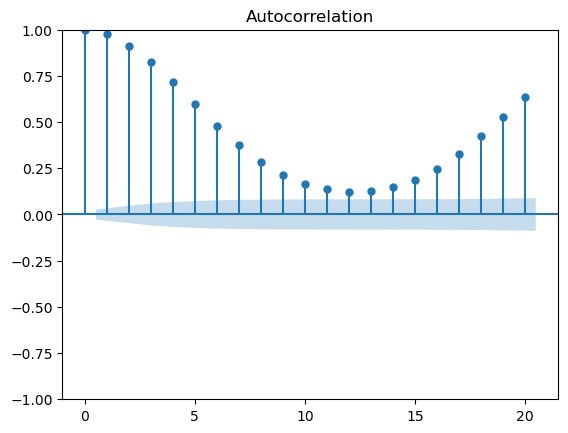

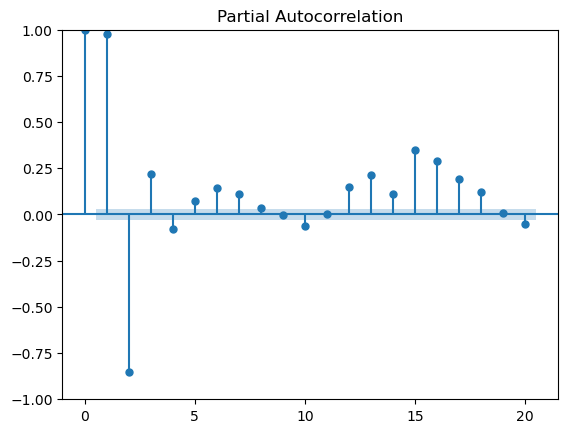

In [108]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plot_acf(data['PJME_MW'], lags=20)
plt.show()

# Plot PACF
plot_pacf(data['PJME_MW'], lags=20)
plt.show()


In [101]:
# Apply ARIMA
p = 1  # Autoregressive (AR) order
d = 1  # Differencing (I) order
q = 1  # Moving Average (MA) order

# Fit ARIMA model
model = ARIMA(data['PJME_MW'], order=(p, d, q))
model_fit = model.fit()

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [102]:
# Forecast
forecast = model_fit.forecast(steps=100)  # Adjust steps as needed

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


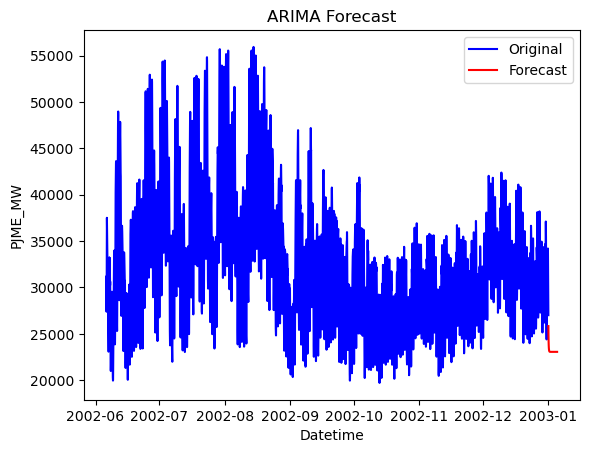

In [106]:
import matplotlib.pyplot as plt

# Plot original data
plt.plot(data.index, data['PJME_MW'], label='Original', color='blue')

# Plot forecasted values
forecast_index = pd.date_range(start=data.index[-1], periods=len(forecast), freq='H')  # Generate datetime index for forecast
plt.plot(forecast_index[:len(forecast)], forecast, label='Forecast', color='red')

# Add labels and legend
plt.xlabel('Datetime')
plt.ylabel('PJME_MW')
plt.title('ARIMA Forecast')
plt.legend()

# Show plot
plt.show()


# SARIMA

In [121]:
import pandas as pd
df = pd.read_csv("hourly.csv")
print(df.head(5))

              Datetime  PJME_MW
0  2002-12-31 01:00:00  26498.0
1  2002-12-31 02:00:00  25147.0
2  2002-12-31 03:00:00  24574.0
3  2002-12-31 04:00:00  24393.0
4  2002-12-31 05:00:00  24860.0


In [122]:
# Calculate the total number of chunks
total_chunks = len(df) // 5000 + 1

# Split the DataFrame into chunks of 1000 values each
data_chunks = [df.iloc[i*5000:(i+1)*5000] for i in range(total_chunks)]

# Print the size of each chunk
for i, chunk in enumerate(data_chunks):
    print(f"Chunk {i+1}: {chunk.shape}")

Chunk 1: (5000, 2)
Chunk 2: (5000, 2)
Chunk 3: (5000, 2)
Chunk 4: (5000, 2)
Chunk 5: (5000, 2)
Chunk 6: (5000, 2)
Chunk 7: (5000, 2)
Chunk 8: (5000, 2)
Chunk 9: (5000, 2)
Chunk 10: (5000, 2)
Chunk 11: (5000, 2)
Chunk 12: (5000, 2)
Chunk 13: (5000, 2)
Chunk 14: (5000, 2)
Chunk 15: (5000, 2)
Chunk 16: (5000, 2)
Chunk 17: (5000, 2)
Chunk 18: (5000, 2)
Chunk 19: (5000, 2)
Chunk 20: (5000, 2)
Chunk 21: (5000, 2)
Chunk 22: (5000, 2)
Chunk 23: (5000, 2)
Chunk 24: (5000, 2)
Chunk 25: (5000, 2)
Chunk 26: (5000, 2)
Chunk 27: (5000, 2)
Chunk 28: (5000, 2)
Chunk 29: (5000, 2)
Chunk 30: (366, 2)


In [124]:
# Access a specific chunk,
data2 = data_chunks[1]
print("\nFirst Chunk:")
print(data2)


First Chunk:
                 Datetime  PJME_MW
5000  2002-06-06 10:00:00  39167.0
5001  2002-06-06 11:00:00  40859.0
5002  2002-06-06 12:00:00  41979.0
5003  2002-06-06 13:00:00  42836.0
5004  2002-06-06 14:00:00  43582.0
...                   ...      ...
9995  2003-11-10 14:00:00  32519.0
9996  2003-11-10 15:00:00  31985.0
9997  2003-11-10 16:00:00  31944.0
9998  2003-11-10 17:00:00  33071.0
9999  2003-11-10 18:00:00  36180.0

[5000 rows x 2 columns]


In [125]:
# Step 2: Train-Test Split
train_size = int(len(data2) * 0.8)
train_data = data2.iloc[:train_size]
test_data = data2.iloc[train_size:]

In [127]:
train_data.tail(5)

,Datetime,PJME_MW
8995,2003-12-22 22:00:00,35521.0
8996,2003-12-22 23:00:00,32786.0
8997,2003-12-23 00:00:00,29597.0
8998,2003-12-21 01:00:00,30300.0
8999,2003-12-21 02:00:00,29014.0


In [128]:
test_data.head(10)

,Datetime,PJME_MW
9000,2003-12-21 03:00:00,28482.0
9001,2003-12-21 04:00:00,28304.0
9002,2003-12-21 05:00:00,28462.0
9003,2003-12-21 06:00:00,29153.0
9004,2003-12-21 07:00:00,30330.0
9005,2003-12-21 08:00:00,31457.0
9006,2003-12-21 09:00:00,32746.0
9007,2003-12-21 10:00:00,33437.0
9008,2003-12-21 11:00:00,33419.0
9009,2003-12-21 12:00:00,32900.0


In [130]:
# Step 3: Modeling
model = SARIMAX(train_data['PJME_MW'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24)) 
model_fit = model.fit()

In [131]:
# Step 4: Forecasting
forecast = model_fit.forecast(steps=len(test_data))

Mean Absolute Error (MAE): 8117.392991475955
Mean Squared Error (MSE): 94450849.32416278
Root Mean Squared Error (RMSE): 9718.582680831747


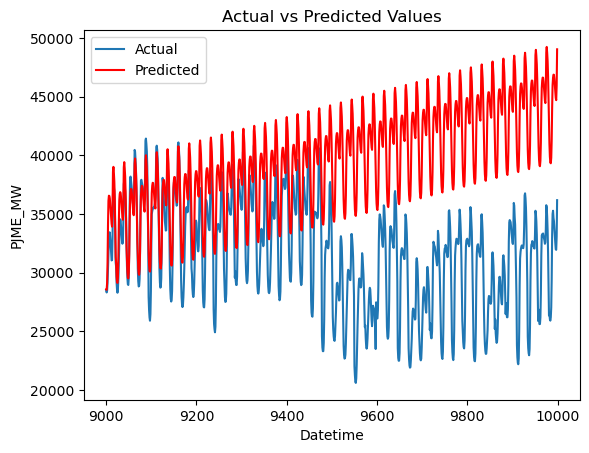

In [134]:
# Step 5: Evaluation
mae = mean_absolute_error(test_data['PJME_MW'], forecast)
mse = mean_squared_error(test_data['PJME_MW'], forecast)
rmse = mean_squared_error(test_data['PJME_MW'], forecast, squared=False)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Step 6: Visualization
plt.plot(test_data['PJME_MW'], label='Actual')
plt.plot(forecast, label='Predicted', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Datetime')
plt.ylabel('PJME_MW')
plt.legend()
plt.show()